## 1. 모델의 정의
* 딥러닝의 모델을 설정하고 구동하는 부분은 모두 model이라는 함수를 선언하며 시작
*1) model = sequencial() : 딥러닝의 구조를 짜고 층을 설정하는 부분
*2) model.compile() : 위에서 정해진 모델을 컴퓨터가 알아들을 수 있게 끔 컴파일 하는 부분
*3) model.fit() : 모델을 실제로 수행하는 부분

In [6]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'ThoraricSurgery.csv'

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

# 불러온 데이터를 적용합니다.
Data_set = np.loadtxt(my_data, delimiter=',')

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[ : , : 17]
Y = Data_set[ : , 17]

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(30, input_dim=17, activation="relu"))
model.add(Dense(1, activation="sigmoid"  ))

# 딥러닝을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)

Saving ThoraricSurgery.csv to ThoraricSurgery (5).csv
Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0

## 2. 입력층, 은닉층, 출력층
```
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
  * 딥러닝 이란 퍼셉트론 위에 숨겨진 퍼셉트론 층을 차고차곡 추가하는 형태
  * sequential()함수를 선언해 놓고 model.add()라는 라인을 추가하면 새로운 층 형성
  * model.add()로 시작하는 2개 라인으로 2개층을 가진 모델
    * 첫번째 은닉층, 두번째가 출력층 
  * 첫번째 층(은닉층)  :  Dense(30, input_dim=17, activation='relu') 
    * 첫번째 인자 30 : 노드 수 
    * input_dim=17 : 입력 데이터로 부터 가져 오는 변수 갯수(폐암 한자 생존 여부 데이터)
    * keras는 입력층을 따로 만들지 않고 첫번째 은닉층에 input_dim을 적어줌으로써, 첫번째 Dense가 은닉층 + 입력층 역활을 겸해서 수행
    * 17개의 값을 받아 은닉층 30개 노드로 보낸 다는 뜻
    * 은닉층의 각 노드는 17개의 입력값에서 임의의 가중치를 가지고 각 노드로 전송되어 활성화 함수를 만나납니다.
    * 활성화 함수를 거친 결과값이 출력층으로 전달
    *activation : 활성화 함수 'relu'
  * 두번째 층(출력층) : model.add(Dense(1, activation='sigmoid'))
    * 출력 값으로 하나로 정해서 보여줘야 하느로 출력 노드 수 1개
    * 이 노드에서 입력받는 값 역시  활성화 함수(sigmoid)를 거쳐 최종값 출력
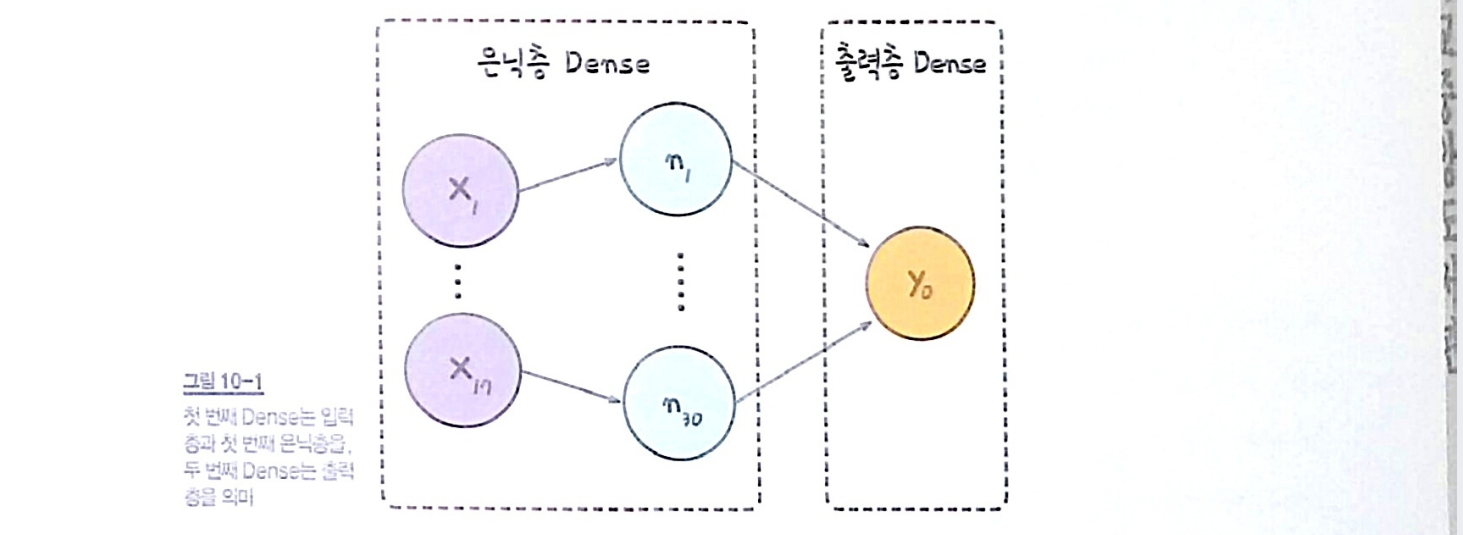
     


### 3. 모델 컴파일
```
# 딥러닝을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)
```
  * model.compile : 앞에서 지정한 모델이 효과적으로 구현 될 수 있게 여러가지 환경을 설정해 주면서 컴파일 하는 부분

* 먼저 어떤 오차함수를 사용할지를 결정 
  * 평균제곱 오차함수(mean_squared_error) : 수렴하기 까지 속도가 오래 걸림 
  * 교차엔트로피 계열 함수 : 출력밧에 로그를 취해서, 오차가 커지면 수렴 속도가 빨라지고 오차가 작아지면 수렴 속도가 감소하게 끔 만든 것, 이항 교차엔트로피 함수(binary_crossentropy)
* optimizer='adam ' ; 최적화  
* metrics=['accuracy'])  : 컴파일 도리때 모델의 수행 결과를 나타 나게 설정
  * 정화도를 측정하기 위해 사용되는 테스트 샘플을 학습 과정에서 제외 시킴으로써 과적합 문제(overfitting : 특정 데이터에서는 잘 작동하나 다른 데이터에서는 장 작동하지 않는 문제)
  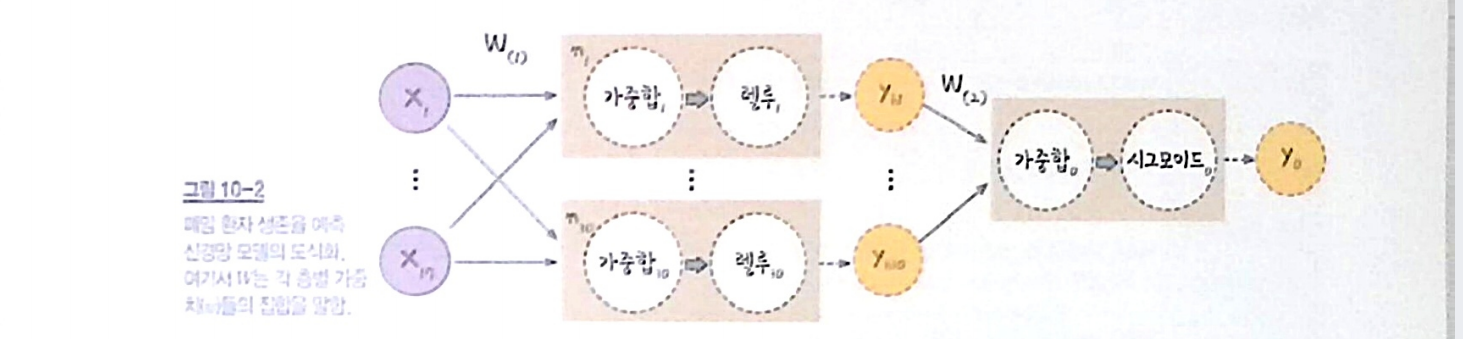

### 4. 교차 엔트로피
  *  이항 교차엔트로피 함수(binary_crossentropy) : 생존 여부 (0, 1)
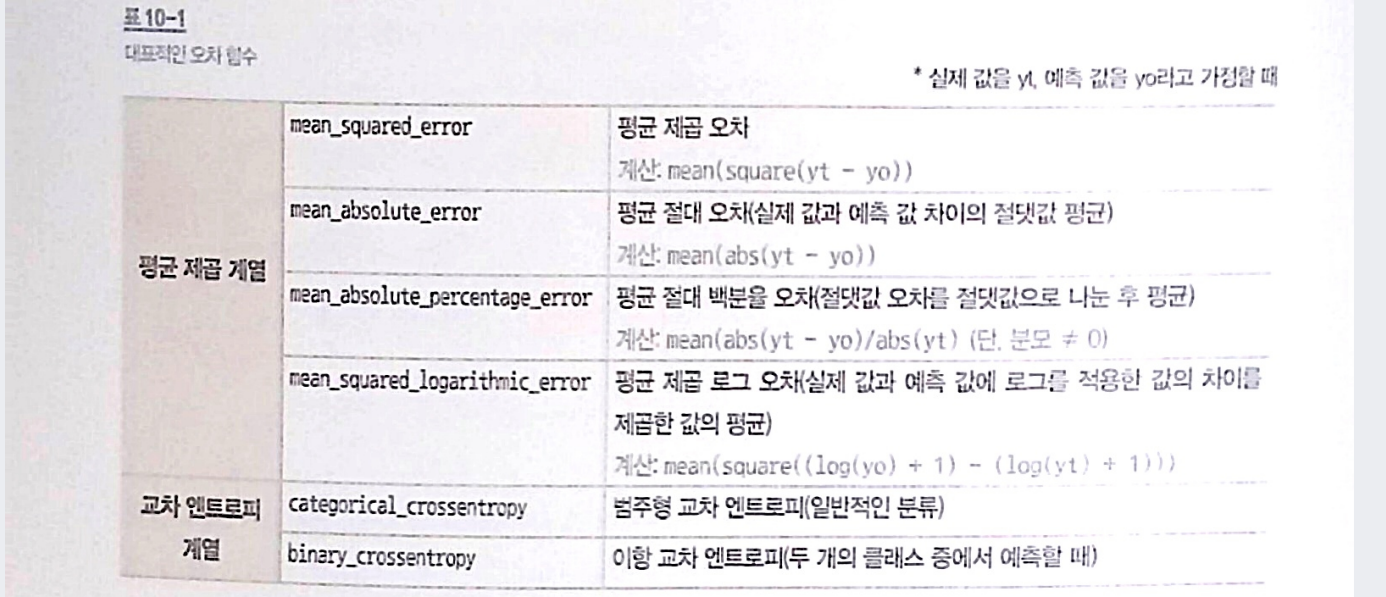

### 5. 모델 실행하기 
```
model.fit(X, Y, epochs=100, batch_size=10)
```
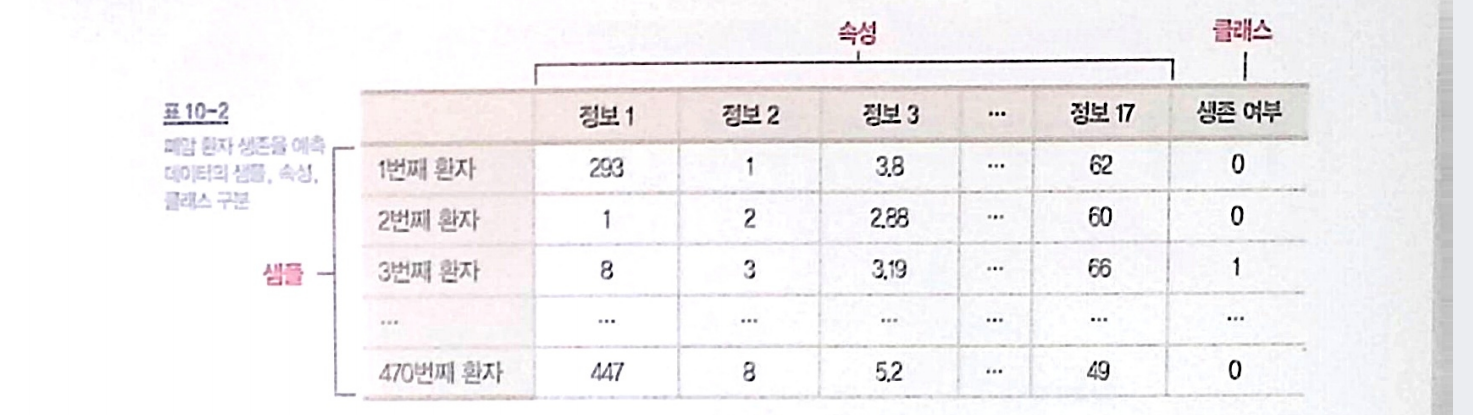



   * 샘플 ( 또는 instance, example) 속성( 또는 feature)
   * epoch : 학습 프로세스가 모든 샘플에 대해 한 번 실행되었을    때
     * epochs = 100 (샘플을 처음 부터 끝 까지 100번 재사용될때 까지 실행을 반복)
   * batch_size : 샘플을 한 번에 몇 개씩 처리 할지를 정하는 부분
     * batch_size = 10 : 전체 470개 샘플을 10개씩 끊어서 집어넣으라는 뜻
     * batch_size 가 너무 크면 학습 속도가 느려지고, 너무 작으면 갓 실행 값의 편차가 생겨서 전체 결과값이 불안정
     자신의 컴퓨터 메모리가 감당할 만큼릐 사이즈 선택 